#### Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


# Data Import

In [1]:
import pandas as pd
import numpy as np
import os
from glob import glob #returns a list of files matching a given pattern
import sqlite3
conn = sqlite3.connect('movies_db.sqlite')
cur = conn.cursor()
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#import a list of all files from the zipped folder
all_files = glob('./zippedData/*.csv.gz') 
all_files

['./zippedData\\bom.movie_gross.csv.gz',
 './zippedData\\imdb.name.basics.csv.gz',
 './zippedData\\imdb.title.akas.csv.gz',
 './zippedData\\imdb.title.basics.csv.gz',
 './zippedData\\imdb.title.crew.csv.gz',
 './zippedData\\imdb.title.principals.csv.gz',
 './zippedData\\imdb.title.ratings.csv.gz',
 './zippedData\\tmdb.movies.csv.gz',
 './zippedData\\tn.movie_budgets.csv.gz']

In [3]:
#create an empty dictionary to store the data
dict_files = {}

#for loop to populate the dictionary
for file in all_files:
    dict_files[file] = pd.read_csv(file)

In [4]:
dict_files.keys() 

dict_keys(['./zippedData\\bom.movie_gross.csv.gz', './zippedData\\imdb.name.basics.csv.gz', './zippedData\\imdb.title.akas.csv.gz', './zippedData\\imdb.title.basics.csv.gz', './zippedData\\imdb.title.crew.csv.gz', './zippedData\\imdb.title.principals.csv.gz', './zippedData\\imdb.title.ratings.csv.gz', './zippedData\\tmdb.movies.csv.gz', './zippedData\\tn.movie_budgets.csv.gz'])

In [5]:
#clean the file names to a common format
cleaned_files = {}
for filename in all_files:
    csv_cleaning = os.path.basename(filename).replace('.csv', '').replace('.', '_')
    filename_df = pd.read_csv(filename, index_col=0)
    cleaned_files[csv_cleaning] = filename_df

In [6]:
cleaned_files.keys()

dict_keys(['bom_movie_gross_gz', 'imdb_name_basics_gz', 'imdb_title_akas_gz', 'imdb_title_basics_gz', 'imdb_title_crew_gz', 'imdb_title_principals_gz', 'imdb_title_ratings_gz', 'tmdb_movies_gz', 'tn_movie_budgets_gz'])

In [8]:
def create_sql_table_from_df(df, name, conn):
    try:
        df.to_sql(name, conn)
        print(f"Created table {name}")
    
    except Exception as e:
        print(f"could not make table {name}")
        print(e)

In [9]:
for name, table in cleaned_files.items():
    create_sql_table_from_df(table, name, conn)

could not make table bom_movie_gross_gz
Table 'bom_movie_gross_gz' already exists.
could not make table imdb_name_basics_gz
Table 'imdb_name_basics_gz' already exists.
could not make table imdb_title_akas_gz
Table 'imdb_title_akas_gz' already exists.
could not make table imdb_title_basics_gz
Table 'imdb_title_basics_gz' already exists.
could not make table imdb_title_crew_gz
Table 'imdb_title_crew_gz' already exists.
could not make table imdb_title_principals_gz
Table 'imdb_title_principals_gz' already exists.
could not make table imdb_title_ratings_gz
Table 'imdb_title_ratings_gz' already exists.
could not make table tmdb_movies_gz
Table 'tmdb_movies_gz' already exists.
could not make table tn_movie_budgets_gz
Table 'tn_movie_budgets_gz' already exists.


In [10]:
for item in cleaned_files.items():
    print('------------------')
    print(item[0])
    print(item[1].info())
    print('------------------')

------------------
bom_movie_gross_gz
<class 'pandas.core.frame.DataFrame'>
Index: 3387 entries, Toy Story 3 to An Actor Prepares
Data columns (total 4 columns):
studio            3382 non-null object
domestic_gross    3359 non-null float64
foreign_gross     2037 non-null object
year              3387 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 132.3+ KB
None
------------------
------------------
imdb_name_basics_gz
<class 'pandas.core.frame.DataFrame'>
Index: 606648 entries, nm0061671 to nm9993380
Data columns (total 5 columns):
primary_name          606648 non-null object
birth_year            82736 non-null float64
death_year            6783 non-null float64
primary_profession    555308 non-null object
known_for_titles      576444 non-null object
dtypes: float64(2), object(3)
memory usage: 27.8+ MB
None
------------------
------------------
imdb_title_akas_gz
<class 'pandas.core.frame.DataFrame'>
Index: 331703 entries, tt0369610 to tt9880178
Data columns (to

# QUESTION 1 - How much do the top 25 profitable movies compare pre and post inflation adjusted?

## Clean Budgets Dataframe

In [15]:
cur.execute("""SELECT * FROM tn_movie_budgets_gz""")

budgets_df = pd.DataFrame(cur.fetchall())
budgets_df.columns = [x[0] for x in cur.description]
budgets_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [16]:
budgets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
id                   5782 non-null int64
release_date         5782 non-null object
movie                5782 non-null object
production_budget    5782 non-null object
domestic_gross       5782 non-null object
worldwide_gross      5782 non-null object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [19]:
# remove symbols and convert datatype to int for multiple columns
def int_conversion(df, col):
    df[col] = df[col].str.replace('$', '').str.replace(',', '').astype('float')
    return df

In [22]:
convert_cols = ['production_budget', 'domestic_gross', 'worldwide_gross']

for col in convert_cols:
    budgets_df = int_conversion(budgets_df, col)

AttributeError: Can only use .str accessor with string values!

In [23]:
budgets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
id                   5782 non-null int64
release_date         5782 non-null object
movie                5782 non-null object
production_budget    5782 non-null float64
domestic_gross       5782 non-null float64
worldwide_gross      5782 non-null float64
dtypes: float64(3), int64(1), object(2)
memory usage: 271.2+ KB


In [24]:
#view top ten highest grossing films pre cpi adjustment
budgets_df.sort_values(by='worldwide_gross', ascending=False, inplace=True)

In [25]:
budgets_df['release_date'] = pd.to_datetime(budgets_df['release_date'])
budgets_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09
42,43,1997-12-19,Titanic,200000000.0,659363944.0,2.208208e+09
5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000.0,936662225.0,2.053311e+09
6,7,2018-04-27,Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09
33,34,2015-06-12,Jurassic World,215000000.0,652270625.0,1.648855e+09


In [27]:
budgets_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 0 to 4068
Data columns (total 6 columns):
id                   5782 non-null int64
release_date         5782 non-null datetime64[ns]
movie                5782 non-null object
production_budget    5782 non-null float64
domestic_gross       5782 non-null float64
worldwide_gross      5782 non-null float64
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 316.2+ KB


In [28]:
budgets_df['gross_profit_loss'] = budgets_df['worldwide_gross'] - budgets_df['production_budget']
budgets_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,gross_profit_loss
0,1,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09,2.351345e+09
42,43,1997-12-19,Titanic,200000000.0,659363944.0,2.208208e+09,2.008208e+09
5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000.0,936662225.0,2.053311e+09,1.747311e+09
6,7,2018-04-27,Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,1.748134e+09
33,34,2015-06-12,Jurassic World,215000000.0,652270625.0,1.648855e+09,1.433855e+09


### Top 25 Profitable Films pre Inflation Adjusted

In [29]:
budgets_df.sort_values(by='gross_profit_loss', ascending=False, inplace=True)

In [31]:
top_25_movies_pre_df = budgets_df[:25]

In [32]:
top_25_movies_pre_df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,gross_profit_loss
0,1,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09,2.351345e+09
42,43,1997-12-19,Titanic,200000000.0,659363944.0,2.208208e+09,2.008208e+09
6,7,2018-04-27,Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,1.748134e+09
5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000.0,936662225.0,2.053311e+09,1.747311e+09
33,34,2015-06-12,Jurassic World,215000000.0,652270625.0,1.648855e+09,1.433855e+09
66,67,2015-04-03,Furious 7,190000000.0,353007020.0,1.518723e+09,1.328723e+09
26,27,2012-05-04,The Avengers,225000000.0,623279547.0,1.517936e+09,1.292936e+09
260,61,2011-07-15,Harry Potter and the Deathly Hallows: Part II,125000000.0,381193157.0,1.341693e+09,1.216693e+09
41,42,2018-02-16,Black Panther,200000000.0,700059566.0,1.348258e+09,1.148258e+09
112,13,2018-06-22,Jurassic World: Fallen Kingdom,170000000.0,417719760.0,1.305773e+09,1.135773e+09


#### Graph Results

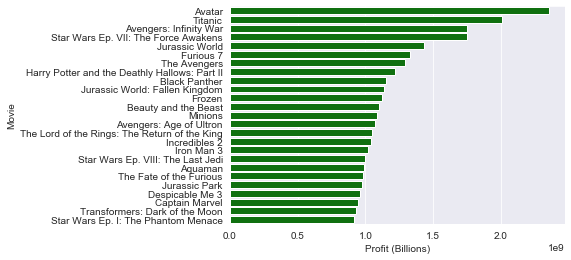

In [36]:
sns.set_style('darkgrid')
barplot = sns.barplot(x ='gross_profit_loss', y ='movie', data= top_25_movies_pre_df, color='green')
barplot.set(xlabel ='Profit (Billions)', ylabel ='Movie')
plt.show()

### Top 25 Profitable Films Adjusted

In [40]:
#break out release date by year
budgets_df['year'] = budgets_df['release_date'].dt.year

In [42]:
budgets_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,gross_profit_loss,year
0,1,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09,2.351345e+09,2009
42,43,1997-12-19,Titanic,200000000.0,659363944.0,2.208208e+09,2.008208e+09,1997
6,7,2018-04-27,Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,1.748134e+09,2018
5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000.0,936662225.0,2.053311e+09,1.747311e+09,2015
33,34,2015-06-12,Jurassic World,215000000.0,652270625.0,1.648855e+09,1.433855e+09,2015


In [43]:
budget_2019 = budgets_df[budgets_df.year == 2019]

In [44]:
budget_2019.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67 entries, 95 to 2
Data columns (total 8 columns):
id                   67 non-null int64
release_date         67 non-null datetime64[ns]
movie                67 non-null object
production_budget    67 non-null float64
domestic_gross       67 non-null float64
worldwide_gross      67 non-null float64
gross_profit_loss    67 non-null float64
year                 67 non-null int64
dtypes: datetime64[ns](1), float64(4), int64(2), object(1)
memory usage: 4.7+ KB


In [47]:
#remove 2019 and 2020, because CPI module doesn't support those years
budget_df_2018 = budgets_df.drop(budgets_df[(budgets_df.year == 2019) & 
                                                      (budgets_df.year == 2020)].index) #what is .index

In [48]:
budget_df_2018 = budget_df_2018[budget_df_2018.year != 2020]

In [49]:
budget_df_2018.year.unique()

array([2009, 1997, 2018, 2015, 2012, 2011, 2013, 2017, 2003, 1993, 2019,
       1999, 1994, 2014, 2016, 2010, 2004, 2001, 2006, 2002, 2008, 2007,
       1982, 1977, 2005, 1996, 1991, 1983, 1980, 1990, 1992, 1975, 2000,
       1989, 1998, 1973, 1988, 1939, 1978, 1985, 1981, 1986, 1995, 1987,
       1984, 1965, 1942, 1972, 1950, 1976, 1979, 1937, 1974, 1964, 1971,
       1967, 1969, 1953, 1940, 1970, 1956, 1968, 1963, 1959, 1962, 1960,
       1961, 1952, 1957, 1966, 1954, 1946, 1951, 1925, 1958, 1915, 1945,
       1943, 1933, 1916, 1949, 1948, 1947, 1955, 1929, 1936, 1920, 1935,
       1938, 1934, 1944, 1931, 1941, 1927, 1930], dtype=int64)

#### Import CPI module

In [51]:
!pip install cpi
import cpi
cpi.update()

In [52]:
#run CPI module to 
budget_df_2018['worldwide_adjusted'] = budget_df_2018.apply(lambda x: 
                                        cpi.inflate(x.gross_profit_loss, x.year), axis=1)

In [88]:
budget_df_2018.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5779 entries, 0 to 2
Data columns (total 9 columns):
id                    5779 non-null int64
release_date          5779 non-null datetime64[ns]
movie                 5779 non-null object
production_budget     5779 non-null float64
domestic_gross        5779 non-null float64
worldwide_gross       5779 non-null float64
gross_profit_loss     5779 non-null float64
year                  5779 non-null int64
worldwide_adjusted    5779 non-null float64
dtypes: datetime64[ns](1), float64(5), int64(2), object(1)
memory usage: 451.5+ KB


In [89]:
#Add 2019 values back into df
budgets_adjusted_df = budget_df_2018.append(budget_2019)

E:\Anaconda\envs\learn-env\lib\site-packages\pandas\core\frame.py:7123: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


In [90]:
budgets_adjusted_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5846 entries, 0 to 2
Data columns (total 9 columns):
domestic_gross        5846 non-null float64
gross_profit_loss     5846 non-null float64
id                    5846 non-null int64
movie                 5846 non-null object
production_budget     5846 non-null float64
release_date          5846 non-null datetime64[ns]
worldwide_adjusted    5779 non-null float64
worldwide_gross       5846 non-null float64
year                  5846 non-null int64
dtypes: datetime64[ns](1), float64(5), int64(2), object(1)
memory usage: 456.7+ KB


In [91]:
budgets_adjusted_df['worldwide_adjusted'].fillna(budgets_adjusted_df['gross_profit_loss'], inplace=True)

In [92]:
budgets_adjusted_df.loc[budgets_adjusted_df['year'] == 2019]

,domestic_gross,gross_profit_loss,id,movie,production_budget,release_date,worldwide_adjusted,worldwide_gross,year
95,426525952.0,948061550.0,96,Captain Marvel,175000000.0,2019-03-08,948061550.0,1.123062e+09,2019
80,246734314.0,437234314.0,81,Aladdin,182000000.0,2019-05-24,437234314.0,6.192343e+08,2019
255,160791800.0,390258283.0,56,How to Train Your Dragon: The Hidden World,129000000.0,2019-02-22,390258283.0,5.192583e+08,2019
496,139606856.0,277899733.0,97,Shazam!,85000000.0,2019-04-05,277899733.0,3.628997e+08,2019
175,139507806.0,261258433.0,76,PokÃ©mon: Detective Pikachu,150000000.0,2019-05-10,261258433.0,4.112584e+08,2019
...,...,...,...,...,...,...,...,...,...
670,0.0,-75000000.0,71,PLAYMOBIL,75000000.0,2019-08-30,-75000000.0,0.000000e+00,2019
619,0.0,-75978328.0,20,Renegades,77500000.0,2019-01-22,-75978328.0,1.521672e+06,2019
480,0.0,-90000000.0,81,Army of the Dead,90000000.0,2019-12-31,-90000000.0,0.000000e+00,2019
341,3100000.0,-106900000.0,42,Men in Black: International,110000000.0,2019-06-14,-106900000.0,3.100000e+06,2019


In [93]:
budgets_adjusted_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5846 entries, 0 to 2
Data columns (total 9 columns):
domestic_gross        5846 non-null float64
gross_profit_loss     5846 non-null float64
id                    5846 non-null int64
movie                 5846 non-null object
production_budget     5846 non-null float64
release_date          5846 non-null datetime64[ns]
worldwide_adjusted    5846 non-null float64
worldwide_gross       5846 non-null float64
year                  5846 non-null int64
dtypes: datetime64[ns](1), float64(5), int64(2), object(1)
memory usage: 456.7+ KB


In [94]:
budgets_adjusted_df.head()

,domestic_gross,gross_profit_loss,id,movie,production_budget,release_date,worldwide_adjusted,worldwide_gross,year
0,760507625.0,2.351345e+09,1,Avatar,425000000.0,2009-12-18,2.802024e+09,2.776345e+09,2009
42,659363944.0,2.008208e+09,43,Titanic,200000000.0,1997-12-19,3.198832e+09,2.208208e+09,1997
6,678815482.0,1.748134e+09,7,Avengers: Infinity War,300000000.0,2018-04-27,1.779810e+09,2.048134e+09,2018
5,936662225.0,1.747311e+09,6,Star Wars Ep. VII: The Force Awakens,306000000.0,2015-12-18,1.884727e+09,2.053311e+09,2015
33,652270625.0,1.433855e+09,34,Jurassic World,215000000.0,2015-06-12,1.546619e+09,1.648855e+09,2015


In [95]:
budgets_adjusted_df.sort_values(by='worldwide_adjusted', ascending=False,
                               inplace=True)
budgets_adjusted_df.head()

,domestic_gross,gross_profit_loss,id,movie,production_budget,release_date,worldwide_adjusted,worldwide_gross,year
4567,198680470.0,3.866252e+08,68,Gone with the Wind,3900000.0,1939-12-15,7.111039e+09,3.905252e+08,1939
5346,102797000.0,2.671420e+08,47,Bambi,858000.0,1942-08-13,4.189983e+09,2.680000e+08,1942
3464,460998007.0,7.755980e+08,65,Star Wars Ep. IV: A New Hope,11000000.0,1977-05-25,3.272064e+09,7.865980e+08,1977
5117,184925486.0,1.834375e+08,18,Snow White and the Seven Dwarfs,1488000.0,1937-12-21,3.256741e+09,1.849255e+08,1937
42,659363944.0,2.008208e+09,43,Titanic,200000000.0,1997-12-19,3.198832e+09,2.208208e+09,1997


#### Graph Results

In [101]:
top_25_adjusted = budgets_adjusted_df[:25]
top_25_adjusted

,domestic_gross,gross_profit_loss,id,movie,production_budget,release_date,worldwide_adjusted,worldwide_gross,year,ROI
4567,198680470.0,3.866252e+08,68,Gone with the Wind,3900000.0,1939-12-15,7.111039e+09,3.905252e+08,1939,99.134665
5346,102797000.0,2.671420e+08,47,Bambi,858000.0,1942-08-13,4.189983e+09,2.680000e+08,1942,311.354312
3464,460998007.0,7.755980e+08,65,Star Wars Ep. IV: A New Hope,11000000.0,1977-05-25,3.272064e+09,7.865980e+08,1977,70.508910
5117,184925486.0,1.834375e+08,18,Snow White and the Seven Dwarfs,1488000.0,1937-12-21,3.256741e+09,1.849255e+08,1937,123.277880
42,659363944.0,2.008208e+09,43,Titanic,200000000.0,1997-12-19,3.198832e+09,2.208208e+09,1997,10.041042
0,760507625.0,2.351345e+09,1,Avatar,425000000.0,2009-12-18,2.802024e+09,2.776345e+09,2009,5.532577
4775,85000000.0,2.606914e+08,76,Cinderella,2900000.0,1950-02-15,2.765460e+09,2.635914e+08,1950,89.893591
3341,230347346.0,4.162145e+08,42,The Exorcist,12000000.0,1973-12-26,2.396580e+09,4.282145e+08,1973,34.684540
3859,163214286.0,2.780143e+08,60,The Sound of Music,8200000.0,1965-03-02,2.256390e+09,2.862143e+08,1965,33.904181
3340,260000000.0,4.587000e+08,41,Jaws,12000000.0,1975-06-20,2.179737e+09,4.707000e+08,1975,38.225000


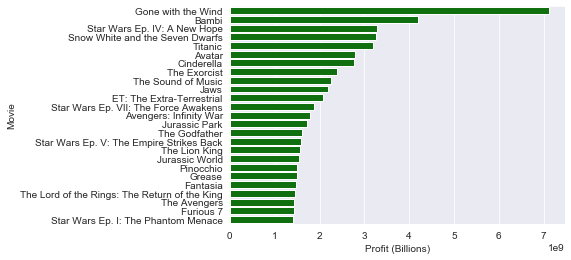

In [72]:
sns.set_style('darkgrid')
barplot = sns.barplot(x ='worldwide_adjusted', y ='movie', data= top_25_adjusted, color='green')
barplot.set(xlabel ='Profit (Billions)', ylabel ='Movie')
plt.show()

## Conclusions and Recommendations

There's a clear difference between the top 25 films when accounting for inflation. The number one most profitable film of all time is "Gone with the Wind" at over seven billion dollars. Avatar, the number one film without adjusting profits for inflation drops down to sixth overall.

When exploring the profitability in any capacity, it's highly recommended to adjust the financial information for inflation, which wiill provide much more accurate conclusions to historical movie data exploration.


# QUESTION 2 - Is there a correlation between ROI and Overall Profit for the top 100 ROI movies?

In [98]:
#Dealing with a %, so inflation adjusted shouldn't matter
budgets_adjusted_df['ROI'] = (budgets_adjusted_df['worldwide_gross'] - 
                                budgets_adjusted_df['production_budget']) / budgets_adjusted_df['production_budget']

In [99]:
budgets_adjusted_df.head()

,domestic_gross,gross_profit_loss,id,movie,production_budget,release_date,worldwide_adjusted,worldwide_gross,year,ROI
4567,198680470.0,3.866252e+08,68,Gone with the Wind,3900000.0,1939-12-15,7.111039e+09,3.905252e+08,1939,99.134665
5346,102797000.0,2.671420e+08,47,Bambi,858000.0,1942-08-13,4.189983e+09,2.680000e+08,1942,311.354312
3464,460998007.0,7.755980e+08,65,Star Wars Ep. IV: A New Hope,11000000.0,1977-05-25,3.272064e+09,7.865980e+08,1977,70.508910
5117,184925486.0,1.834375e+08,18,Snow White and the Seven Dwarfs,1488000.0,1937-12-21,3.256741e+09,1.849255e+08,1937,123.277880
42,659363944.0,2.008208e+09,43,Titanic,200000000.0,1997-12-19,3.198832e+09,2.208208e+09,1997,10.041042


In [100]:
roi_df = budgets_adjusted_df
roi_df.head()

,domestic_gross,gross_profit_loss,id,movie,production_budget,release_date,worldwide_adjusted,worldwide_gross,year,ROI
4567,198680470.0,3.866252e+08,68,Gone with the Wind,3900000.0,1939-12-15,7.111039e+09,3.905252e+08,1939,99.134665
5346,102797000.0,2.671420e+08,47,Bambi,858000.0,1942-08-13,4.189983e+09,2.680000e+08,1942,311.354312
3464,460998007.0,7.755980e+08,65,Star Wars Ep. IV: A New Hope,11000000.0,1977-05-25,3.272064e+09,7.865980e+08,1977,70.508910
5117,184925486.0,1.834375e+08,18,Snow White and the Seven Dwarfs,1488000.0,1937-12-21,3.256741e+09,1.849255e+08,1937,123.277880
42,659363944.0,2.008208e+09,43,Titanic,200000000.0,1997-12-19,3.198832e+09,2.208208e+09,1997,10.041042


In [123]:
roi_df.sort_values(by='ROI', ascending = False, inplace = True)
roi_df.head()

,domestic_gross,gross_profit_loss,id,movie,production_budget,release_date,worldwide_adjusted,worldwide_gross,year,ROI
5745,45000000.0,44975000.0,46,Deep Throat,25000.0,1972-06-30,2.750759e+08,45000000.0,1972,1799.000000
5613,8750000.0,99550000.0,14,Mad Max,200000.0,1980-03-21,3.088672e+08,99750000.0,1980,497.750000
5492,107918810.0,193733034.0,93,Paranormal Activity,450000.0,2009-09-25,2.308656e+08,194183034.0,2009,430.517853
5679,22764410.0,41556474.0,80,The Gallows,100000.0,2015-07-10,4.482465e+07,41656474.0,2015,415.564740
5406,140539099.0,247700000.0,7,The Blair Witch Project,600000.0,1999-07-14,3.801095e+08,248300000.0,1999,412.833333


In [124]:
top_100_roi_df = roi_df[:100]

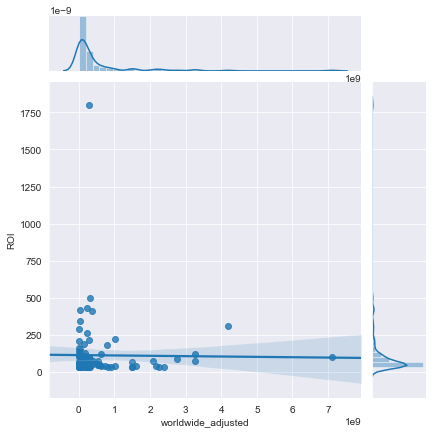

In [125]:
sns.jointplot('worldwide_adjusted', 'ROI', data = top_100_roi_df,
             kind = 'reg', truncate = False)

In [119]:
top_100_roi_df['year'].value_counts()

2004    6
1997    4
1977    4
1998    3
2012    3
2007    3
1974    3
1978    3
1972    3
1980    2
1986    2
1999    2
1990    2
1963    2
1971    2
1994    2
1942    2
1964    2
1973    2
2001    2
2010    2
2017    2
2016    2
2015    2
2014    2
1940    2
2011    2
2009    2
2006    2
2005    2
1965    1
1939    1
1968    1
1969    1
1970    1
1937    1
1953    1
1950    1
1916    1
1987    1
1975    1
1976    1
1979    1
1981    1
1982    1
1983    1
1915    1
1989    1
1991    1
1993    1
1995    1
1996    1
2002    1
2008    1
2013    1
1925    1
Name: year, dtype: int64

# Most Profitable Films by Release Month

In [170]:
budgets_adjusted_df['month'] = budgets_df['release_date'].dt.month

In [171]:
budgets_adjusted_df.head()

,domestic_gross,gross_profit_loss,id,movie,production_budget,release_date,worldwide_adjusted,worldwide_gross,year,ROI,month
5745,45000000.0,44975000.0,46,Deep Throat,25000.0,1972-06-30,2.750759e+08,45000000.0,1972,1799.000000,6
5613,8750000.0,99550000.0,14,Mad Max,200000.0,1980-03-21,3.088672e+08,99750000.0,1980,497.750000,3
5492,107918810.0,193733034.0,93,Paranormal Activity,450000.0,2009-09-25,2.308656e+08,194183034.0,2009,430.517853,9
5679,22764410.0,41556474.0,80,The Gallows,100000.0,2015-07-10,4.482465e+07,41656474.0,2015,415.564740,7
5406,140539099.0,247700000.0,7,The Blair Witch Project,600000.0,1999-07-14,3.801095e+08,248300000.0,1999,412.833333,7


In [184]:
top_200_films = budgets_adjusted_df

In [185]:
top_200_films.sort_values(by='worldwide_adjusted', ascending = False, inplace = True)
top_200_films.head()

,domestic_gross,gross_profit_loss,id,movie,production_budget,release_date,worldwide_adjusted,worldwide_gross,year,ROI,month
4567,198680470.0,3.866252e+08,68,Gone with the Wind,3900000.0,1939-12-15,7.111039e+09,3.905252e+08,1939,99.134665,12
5346,102797000.0,2.671420e+08,47,Bambi,858000.0,1942-08-13,4.189983e+09,2.680000e+08,1942,311.354312,8
3464,460998007.0,7.755980e+08,65,Star Wars Ep. IV: A New Hope,11000000.0,1977-05-25,3.272064e+09,7.865980e+08,1977,70.508910,5
5117,184925486.0,1.834375e+08,18,Snow White and the Seven Dwarfs,1488000.0,1937-12-21,3.256741e+09,1.849255e+08,1937,123.277880,12
42,659363944.0,2.008208e+09,43,Titanic,200000000.0,1997-12-19,3.198832e+09,2.208208e+09,1997,10.041042,12


In [186]:
top_200_films_final_df = top_200_films[:200]

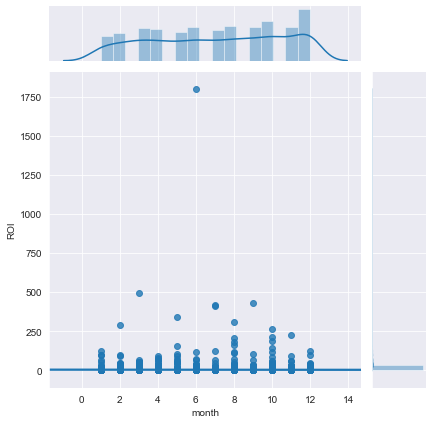

In [172]:
sns.jointplot('month', 'ROI', data = budgets_adjusted_df,
             kind = 'reg', truncate = False)

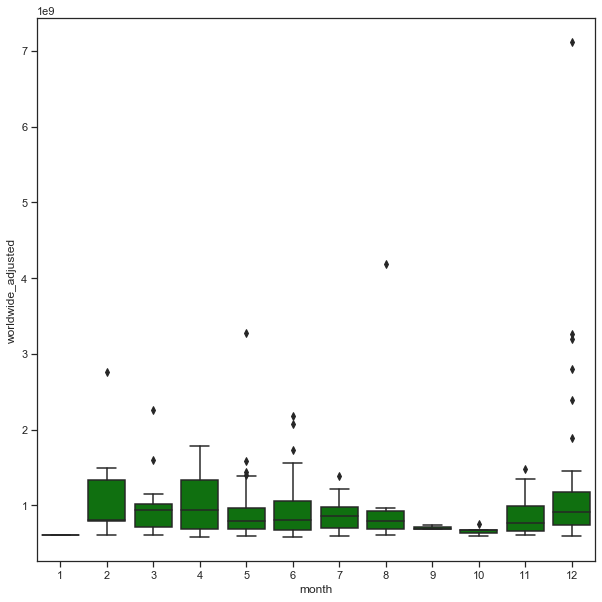

In [188]:
sns.set(style='ticks')

f, ax = plt.subplots(figsize = (10,10))


sns.boxplot(x = 'month', y = 'worldwide_adjusted', data = top_200_films_final_df,
           color='green')
plt.show()

### Data Import and Clean for Questions 2 and 3

#### Directors db

In [126]:
####Not using
cur.execute("""SELECT * FROM imdb_title_crew_gz
            """)

directors_df = pd.DataFrame(cur.fetchall())
directors_df.columns = [x[0] for x in cur.description]
directors_df.head()

,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
1,tt0438973,None,"nm0175726,nm1802864"
2,tt0462036,nm1940585,nm1940585
3,tt0835418,nm0151540,"nm0310087,nm0841532"
4,tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943


In [128]:
directors_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 3 columns):
tconst       146144 non-null object
directors    140417 non-null object
writers      110261 non-null object
dtypes: object(3)
memory usage: 3.3+ MB


In [131]:
directors_df = directors_df.drop('writers', axis=1)

#### Genres and Runtime df

In [127]:
cur.execute("""SELECT * FROM imdb_title_basics_gz""")

genres_df = pd.DataFrame(cur.fetchall())
genres_df.columns = [x[0] for x in cur.description]
genres_df.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [129]:
genres_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
tconst             146144 non-null object
primary_title      146144 non-null object
original_title     146123 non-null object
start_year         146144 non-null int64
runtime_minutes    114405 non-null float64
genres             140736 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [134]:
genres_df = genres_df.drop('start_year',  axis=1)

In [137]:
genres_df = genres_df.drop('original_title',  axis=1)

In [138]:
genres_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 4 columns):
tconst             146144 non-null object
primary_title      146144 non-null object
runtime_minutes    114405 non-null float64
genres             140736 non-null object
dtypes: float64(1), object(3)
memory usage: 4.5+ MB


#### Ratings df

In [140]:
cur.execute("""SELECT * FROM imdb_title_ratings_gz""")

ratings_df = pd.DataFrame(cur.fetchall())
ratings_df.columns = [x[0] for x in cur.description]
ratings_df.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [141]:
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
tconst           73856 non-null object
averagerating    73856 non-null float64
numvotes         73856 non-null int64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


##### Merge Ratings and Genres df

In [148]:
movie_ratings_df = pd.merge(genres_df, ratings_df, 
                                 left_on = ['tconst'], right_on = ['tconst'],
                                 how = 'right')
movie_ratings_df.head()

,tconst,primary_title,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,80.0,"Comedy,Drama,Fantasy",6.5,119


In [149]:
movie_ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73856 entries, 0 to 73855
Data columns (total 6 columns):
tconst             73856 non-null object
primary_title      73856 non-null object
runtime_minutes    66236 non-null float64
genres             73052 non-null object
averagerating      73856 non-null float64
numvotes           73856 non-null int64
dtypes: float64(2), int64(1), object(3)
memory usage: 3.9+ MB


#### Jobs df

In [150]:
cur.execute("""SELECT * FROM imdb_title_principals_gz""")

jobs_df = pd.DataFrame(cur.fetchall())
jobs_df.columns = [x[0] for x in cur.description]
jobs_df.head(20)

,tconst,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,None,"[""The Man""]"
1,tt0111414,2,nm0398271,director,None,None
2,tt0111414,3,nm3739909,producer,producer,None
3,tt0323808,10,nm0059247,editor,None,None
4,tt0323808,1,nm3579312,actress,None,"[""Beth Boothby""]"


In [151]:
jobs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028186 entries, 0 to 1028185
Data columns (total 6 columns):
tconst        1028186 non-null object
ordering      1028186 non-null int64
nconst        1028186 non-null object
category      1028186 non-null object
job           177684 non-null object
characters    393360 non-null object
dtypes: int64(1), object(5)
memory usage: 47.1+ MB


#### Name Basics df

In [144]:
cur.execute("""SELECT * FROM imdb_name_basics_gz""")

names_df = pd.DataFrame(cur.fetchall())
names_df.columns = [x[0] for x in cur.description]
names_df.head()

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"


In [145]:
names_df = names_df.drop('birth_year',  axis=1)

In [146]:
names_df = names_df.drop('death_year',  axis=1)

In [147]:
names_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606648 entries, 0 to 606647
Data columns (total 4 columns):
nconst                606648 non-null object
primary_name          606648 non-null object
primary_profession    555308 non-null object
known_for_titles      576444 non-null object
dtypes: object(4)
memory usage: 18.5+ MB


##### Merge Names and Jobs df

In [153]:
names_jobs_df = pd.merge(jobs_df, names_df, 
                                 left_on = ['nconst'], right_on = ['nconst'],
                                     how = 'right')
names_jobs_df.head()

,tconst,ordering,nconst,category,job,characters,primary_name,primary_profession,known_for_titles
0,tt0111414,1.0,nm0246005,actor,None,"[""The Man""]",Tommy Dysart,actor,"tt0093120,tt0076974,tt0084296,tt0077064"
1,tt0111414,2.0,nm0398271,director,None,None,Frank Howson,"actor,writer,producer","tt0104271,tt0094789,tt0102076,tt0111414"
2,tt5573596,5.0,nm0398271,director,None,None,Frank Howson,"actor,writer,producer","tt0104271,tt0094789,tt0102076,tt0111414"
3,tt0111414,3.0,nm3739909,producer,producer,None,Barry Porter-Robinson,"producer,art_department","tt0290884,tt0101374,tt0111414,tt1566940"
4,tt0323808,10.0,nm0059247,editor,None,None,Sean Barton,"editor,editorial_department,assistant_director","tt0402910,tt1022883,tt0086190,tt0490181"


In [159]:
names_jobs_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1030270 entries, 0 to 1030269
Data columns (total 9 columns):
tconst                1027912 non-null object
ordering              1027912 non-null float64
nconst                1030270 non-null object
category              1027912 non-null object
job                   177684 non-null object
characters            393171 non-null object
primary_name          1030270 non-null object
primary_profession    976597 non-null object
known_for_titles      999704 non-null object
dtypes: float64(1), object(8)
memory usage: 78.6+ MB


In [160]:
director_jobs_df = names_jobs_df[names_jobs_df.category == 'director']

In [161]:
director_jobs_df.head()

,tconst,ordering,nconst,category,job,characters,primary_name,primary_profession,known_for_titles
1,tt0111414,2.0,nm0398271,director,None,None,Frank Howson,"actor,writer,producer","tt0104271,tt0094789,tt0102076,tt0111414"
2,tt5573596,5.0,nm0398271,director,None,None,Frank Howson,"actor,writer,producer","tt0104271,tt0094789,tt0102076,tt0111414"
19,tt0323808,5.0,nm0362736,director,None,None,Robin Hardy,"actor,writer,director","tt0070917,tt0097375,tt0091032,tt0323808"
80,tt0417610,5.0,nm1145057,director,None,None,Alejandro Chomski,"director,writer,producer","tt3350042,tt6483054,tt0417610,tt0347207"
81,tt5291716,5.0,nm1145057,director,None,None,Alejandro Chomski,"director,writer,producer","tt3350042,tt6483054,tt0417610,tt0347207"


In [162]:
director_jobs_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146393 entries, 1 to 1027909
Data columns (total 9 columns):
tconst                146393 non-null object
ordering              146393 non-null float64
nconst                146393 non-null object
category              146393 non-null object
job                   7504 non-null object
characters            0 non-null object
primary_name          146393 non-null object
primary_profession    145806 non-null object
known_for_titles      142189 non-null object
dtypes: float64(1), object(8)
memory usage: 11.2+ MB


##### Merge Jobs, Names, Titles, and Ratings 

In [163]:
directors_ratings_df = pd.merge(director_jobs_df, movie_ratings_df, 
                                 left_on = ['tconst'], right_on = ['tconst'],
                                 how = 'inner')
directors_ratings_df.head()

,tconst,ordering,nconst,category,job,characters,primary_name,primary_profession,known_for_titles,primary_title,runtime_minutes,genres,averagerating,numvotes
0,tt5573596,5.0,nm0398271,director,None,None,Frank Howson,"actor,writer,producer","tt0104271,tt0094789,tt0102076,tt0111414",Remembering Nigel,NaN,Comedy,7.8,6
1,tt0323808,5.0,nm0362736,director,None,None,Robin Hardy,"actor,writer,director","tt0070917,tt0097375,tt0091032,tt0323808",The Wicker Tree,96.0,"Drama,Horror",3.9,2328
2,tt0417610,5.0,nm1145057,director,None,None,Alejandro Chomski,"director,writer,producer","tt3350042,tt6483054,tt0417610,tt0347207",Asleep in the Sun,83.0,Fantasy,6.4,80
3,tt5291716,5.0,nm1145057,director,None,None,Alejandro Chomski,"director,writer,producer","tt3350042,tt6483054,tt0417610,tt0347207",Maldito Seas Waterfall!,71.0,Comedy,6.2,49
4,tt4551544,5.0,nm1145057,director,None,None,Alejandro Chomski,"director,writer,producer","tt3350042,tt6483054,tt0417610,tt0347207",Existir sin vos. Una noche con Charly García,65.0,Documentary,8.1,14


In [164]:
directors_ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77452 entries, 0 to 77451
Data columns (total 14 columns):
tconst                77452 non-null object
ordering              77452 non-null float64
nconst                77452 non-null object
category              77452 non-null object
job                   3073 non-null object
characters            0 non-null object
primary_name          77452 non-null object
primary_profession    77369 non-null object
known_for_titles      76780 non-null object
primary_title         77452 non-null object
runtime_minutes       69596 non-null float64
genres                76721 non-null object
averagerating         77452 non-null float64
numvotes              77452 non-null int64
dtypes: float64(3), int64(1), object(10)
memory usage: 8.9+ MB


In [165]:
#Drop unwanted columns
directors_ratings_df = directors_ratings_df.drop('job', axis=1)

In [166]:
directors_ratings_df = directors_ratings_df.drop('characters', axis=1)

In [167]:
directors_ratings_df = directors_ratings_df.drop('primary_profession', axis=1)

In [168]:
directors_ratings_df = directors_ratings_df.drop('known_for_titles', axis=1)

In [169]:
directors_ratings_df.head()

,tconst,ordering,nconst,category,primary_name,primary_title,runtime_minutes,genres,averagerating,numvotes
0,tt5573596,5.0,nm0398271,director,Frank Howson,Remembering Nigel,NaN,Comedy,7.8,6
1,tt0323808,5.0,nm0362736,director,Robin Hardy,The Wicker Tree,96.0,"Drama,Horror",3.9,2328
2,tt0417610,5.0,nm1145057,director,Alejandro Chomski,Asleep in the Sun,83.0,Fantasy,6.4,80
3,tt5291716,5.0,nm1145057,director,Alejandro Chomski,Maldito Seas Waterfall!,71.0,Comedy,6.2,49
4,tt4551544,5.0,nm1145057,director,Alejandro Chomski,Existir sin vos. Una noche con Charly García,65.0,Documentary,8.1,14


##### Merge all df's on Title

In [189]:
#Inner join on title for
movie_data_df = pd.merge(budgets_adjusted_df, directors_ratings_df, 
                                 left_on = ['movie'], right_on = ['primary_title'],
                                 how = 'inner')

In [190]:
movie_data_df.head()

,domestic_gross,gross_profit_loss,id,movie,production_budget,release_date,worldwide_adjusted,worldwide_gross,year,ROI,...,tconst,ordering,nconst,category,primary_name,primary_title,runtime_minutes,genres,averagerating,numvotes
0,102797000.0,2.671420e+08,47,Bambi,858000.0,1942-08-13,4.189983e+09,2.680000e+08,1942,311.354312,...,tt2668120,2.0,nm0509852,director,Sébastien Lifshitz,Bambi,58.0,"Biography,Documentary",7.0,101
1,760507625.0,2.351345e+09,1,Avatar,425000000.0,2009-12-18,2.802024e+09,2.776345e+09,2009,5.532577,...,tt1775309,5.0,nm3786927,director,Atsushi Wada,Avatar,93.0,Horror,6.1,43
2,85000000.0,2.606914e+08,76,Cinderella,2900000.0,1950-02-15,2.765460e+09,2.635914e+08,1950,89.893591,...,tt1661199,5.0,nm0000110,director,Kenneth Branagh,Cinderella,105.0,"Drama,Family,Fantasy",6.9,142792
3,201151353.0,4.395514e+08,13,Cinderella,95000000.0,2015-03-13,4.741195e+08,5.345514e+08,2015,4.626856,...,tt1661199,5.0,nm0000110,director,Kenneth Branagh,Cinderella,105.0,"Drama,Family,Fantasy",6.9,142792
4,678815482.0,1.748134e+09,7,Avengers: Infinity War,300000000.0,2018-04-27,1.779810e+09,2.048134e+09,2018,5.827114,...,tt4154756,5.0,nm0751577,director,Anthony Russo,Avengers: Infinity War,149.0,"Action,Adventure,Sci-Fi",8.5,670926


In [199]:
movie_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3051 entries, 1114 to 2388
Data columns (total 21 columns):
domestic_gross        3051 non-null float64
gross_profit_loss     3051 non-null float64
id                    3051 non-null int64
movie                 3051 non-null object
production_budget     3051 non-null float64
release_date          3051 non-null datetime64[ns]
worldwide_adjusted    3051 non-null float64
worldwide_gross       3051 non-null float64
year                  3051 non-null int64
ROI                   3051 non-null float64
month                 3051 non-null int64
tconst                3051 non-null object
ordering              3051 non-null float64
nconst                3051 non-null object
category              3051 non-null object
primary_name          3051 non-null object
primary_title         3051 non-null object
runtime_minutes       2934 non-null float64
genres                3045 non-null object
averagerating         3051 non-null float64
numvotes        

# Most Profitable ROI Directors vs Rating

In [205]:
top_directors_df = movie_data_df

In [229]:
top_directors_df.sort_values(by='worldwide_adjusted', ascending = False, inplace = True)

In [230]:
top_directors_df.head()

,domestic_gross,gross_profit_loss,id,movie,production_budget,release_date,worldwide_adjusted,worldwide_gross,year,ROI,...,tconst,ordering,nconst,category,primary_name,primary_title,runtime_minutes,genres,averagerating,numvotes
0,102797000.0,2.671420e+08,47,Bambi,858000.0,1942-08-13,4.189983e+09,2.680000e+08,1942,311.354312,...,tt2668120,2.0,nm0509852,director,Sébastien Lifshitz,Bambi,58.0,"Biography,Documentary",7.0,101
1,760507625.0,2.351345e+09,1,Avatar,425000000.0,2009-12-18,2.802024e+09,2.776345e+09,2009,5.532577,...,tt1775309,5.0,nm3786927,director,Atsushi Wada,Avatar,93.0,Horror,6.1,43
2,85000000.0,2.606914e+08,76,Cinderella,2900000.0,1950-02-15,2.765460e+09,2.635914e+08,1950,89.893591,...,tt1661199,5.0,nm0000110,director,Kenneth Branagh,Cinderella,105.0,"Drama,Family,Fantasy",6.9,142792
4,678815482.0,1.748134e+09,7,Avengers: Infinity War,300000000.0,2018-04-27,1.779810e+09,2.048134e+09,2018,5.827114,...,tt4154756,5.0,nm0751577,director,Anthony Russo,Avengers: Infinity War,149.0,"Action,Adventure,Sci-Fi",8.5,670926
5,678815482.0,1.748134e+09,7,Avengers: Infinity War,300000000.0,2018-04-27,1.779810e+09,2.048134e+09,2018,5.827114,...,tt4154756,6.0,nm0751648,director,Joe Russo,Avengers: Infinity War,149.0,"Action,Adventure,Sci-Fi",8.5,670926


In [218]:
top_directors_df.columns

Index(['domestic_gross', 'gross_profit_loss', 'id', 'movie',
       'production_budget', 'release_date', 'worldwide_adjusted',
       'worldwide_gross', 'year', 'ROI', 'month', 'tconst', 'ordering',
       'nconst', 'category', 'primary_name', 'primary_title',
       'runtime_minutes', 'genres', 'averagerating', 'numvotes'],
      dtype='object')

In [233]:
top_directors_df.head(30)

,domestic_gross,gross_profit_loss,id,movie,production_budget,release_date,worldwide_adjusted,worldwide_gross,year,ROI,...,tconst,ordering,nconst,category,primary_name,primary_title,runtime_minutes,genres,averagerating,numvotes
0,102797000.0,2.671420e+08,47,Bambi,858000.0,1942-08-13,4.189983e+09,2.680000e+08,1942,311.354312,...,tt2668120,2.0,nm0509852,director,Sébastien Lifshitz,Bambi,58.0,"Biography,Documentary",7.0,101
1,760507625.0,2.351345e+09,1,Avatar,425000000.0,2009-12-18,2.802024e+09,2.776345e+09,2009,5.532577,...,tt1775309,5.0,nm3786927,director,Atsushi Wada,Avatar,93.0,Horror,6.1,43
2,85000000.0,2.606914e+08,76,Cinderella,2900000.0,1950-02-15,2.765460e+09,2.635914e+08,1950,89.893591,...,tt1661199,5.0,nm0000110,director,Kenneth Branagh,Cinderella,105.0,"Drama,Family,Fantasy",6.9,142792
4,678815482.0,1.748134e+09,7,Avengers: Infinity War,300000000.0,2018-04-27,1.779810e+09,2.048134e+09,2018,5.827114,...,tt4154756,5.0,nm0751577,director,Anthony Russo,Avengers: Infinity War,149.0,"Action,Adventure,Sci-Fi",8.5,670926
5,678815482.0,1.748134e+09,7,Avengers: Infinity War,300000000.0,2018-04-27,1.779810e+09,2.048134e+09,2018,5.827114,...,tt4154756,6.0,nm0751648,director,Joe Russo,Avengers: Infinity War,149.0,"Action,Adventure,Sci-Fi",8.5,670926
6,652270625.0,1.433855e+09,34,Jurassic World,215000000.0,2015-06-12,1.546619e+09,1.648855e+09,2015,6.669092,...,tt0369610,5.0,nm1119880,director,Colin Trevorrow,Jurassic World,124.0,"Action,Adventure,Sci-Fi",7.0,539338
7,84300000.0,8.201075e+07,68,Pinocchio,2289247.0,1940-02-09,1.497616e+09,8.430000e+07,1940,35.824336,...,tt1693039,5.0,nm0195039,director,Enzo D'Alò,Pinocchio,75.0,"Animation,Family,Fantasy",6.3,224
8,84300000.0,8.201075e+07,68,Pinocchio,2289247.0,1940-02-09,1.497616e+09,8.430000e+07,1940,35.824336,...,tt4242112,5.0,nm6947886,director,Stepán Gajdos,Pinocchio,NaN,"Family,Fantasy",4.9,46
11,83320000.0,8.104000e+07,69,Fantasia,2280000.0,1940-11-13,1.479889e+09,8.332000e+07,1940,35.543860,...,tt3591950,5.0,nm0910852,director,Chao Wang,Fantasia,86.0,Drama,5.5,44
12,623279547.0,1.292936e+09,27,The Avengers,225000000.0,2012-05-04,1.439707e+09,1.517936e+09,2012,5.746382,...,tt0848228,5.0,nm0923736,director,Joss Whedon,The Avengers,143.0,"Action,Adventure,Sci-Fi",8.1,1183655


In [234]:
top_directors_df.drop([7, 17, 15, 16, 23, 25], inplace=True)

In [237]:
top_directors_df.head(30)

,domestic_gross,gross_profit_loss,id,movie,production_budget,release_date,worldwide_adjusted,worldwide_gross,year,ROI,...,tconst,ordering,nconst,category,primary_name,primary_title,runtime_minutes,genres,averagerating,numvotes
0,102797000.0,2.671420e+08,47,Bambi,858000.0,1942-08-13,4.189983e+09,2.680000e+08,1942,311.354312,...,tt2668120,2.0,nm0509852,director,Sébastien Lifshitz,Bambi,58.0,"Biography,Documentary",7.0,101
1,760507625.0,2.351345e+09,1,Avatar,425000000.0,2009-12-18,2.802024e+09,2.776345e+09,2009,5.532577,...,tt1775309,5.0,nm3786927,director,Atsushi Wada,Avatar,93.0,Horror,6.1,43
2,85000000.0,2.606914e+08,76,Cinderella,2900000.0,1950-02-15,2.765460e+09,2.635914e+08,1950,89.893591,...,tt1661199,5.0,nm0000110,director,Kenneth Branagh,Cinderella,105.0,"Drama,Family,Fantasy",6.9,142792
4,678815482.0,1.748134e+09,7,Avengers: Infinity War,300000000.0,2018-04-27,1.779810e+09,2.048134e+09,2018,5.827114,...,tt4154756,5.0,nm0751577,director,Anthony Russo,Avengers: Infinity War,149.0,"Action,Adventure,Sci-Fi",8.5,670926
5,678815482.0,1.748134e+09,7,Avengers: Infinity War,300000000.0,2018-04-27,1.779810e+09,2.048134e+09,2018,5.827114,...,tt4154756,6.0,nm0751648,director,Joe Russo,Avengers: Infinity War,149.0,"Action,Adventure,Sci-Fi",8.5,670926
6,652270625.0,1.433855e+09,34,Jurassic World,215000000.0,2015-06-12,1.546619e+09,1.648855e+09,2015,6.669092,...,tt0369610,5.0,nm1119880,director,Colin Trevorrow,Jurassic World,124.0,"Action,Adventure,Sci-Fi",7.0,539338
8,84300000.0,8.201075e+07,68,Pinocchio,2289247.0,1940-02-09,1.497616e+09,8.430000e+07,1940,35.824336,...,tt4242112,5.0,nm6947886,director,Stepán Gajdos,Pinocchio,NaN,"Family,Fantasy",4.9,46
11,83320000.0,8.104000e+07,69,Fantasia,2280000.0,1940-11-13,1.479889e+09,8.332000e+07,1940,35.543860,...,tt3591950,5.0,nm0910852,director,Chao Wang,Fantasia,86.0,Drama,5.5,44
12,623279547.0,1.292936e+09,27,The Avengers,225000000.0,2012-05-04,1.439707e+09,1.517936e+09,2012,5.746382,...,tt0848228,5.0,nm0923736,director,Joss Whedon,The Avengers,143.0,"Action,Adventure,Sci-Fi",8.1,1183655
14,353007020.0,1.328723e+09,67,Furious 7,190000000.0,2015-04-03,1.433219e+09,1.518723e+09,2015,6.993278,...,tt2820852,5.0,nm1490123,director,James Wan,Furious 7,137.0,"Action,Crime,Thriller",7.2,335074


In [238]:
top_directors_df.drop([4, 26, 33, 36, 37], inplace=True)

In [240]:
top_directors_df.drop([51, 42, 39], inplace=True)

In [ ]:
top_directors_df.drop([], inplace=True)

In [242]:
top_directors_df.head(20)

,domestic_gross,gross_profit_loss,id,movie,production_budget,release_date,worldwide_adjusted,worldwide_gross,year,ROI,...,tconst,ordering,nconst,category,primary_name,primary_title,runtime_minutes,genres,averagerating,numvotes
0,102797000.0,2.671420e+08,47,Bambi,858000.0,1942-08-13,4.189983e+09,2.680000e+08,1942,311.354312,...,tt2668120,2.0,nm0509852,director,Sébastien Lifshitz,Bambi,58.0,"Biography,Documentary",7.0,101
1,760507625.0,2.351345e+09,1,Avatar,425000000.0,2009-12-18,2.802024e+09,2.776345e+09,2009,5.532577,...,tt1775309,5.0,nm3786927,director,Atsushi Wada,Avatar,93.0,Horror,6.1,43
2,85000000.0,2.606914e+08,76,Cinderella,2900000.0,1950-02-15,2.765460e+09,2.635914e+08,1950,89.893591,...,tt1661199,5.0,nm0000110,director,Kenneth Branagh,Cinderella,105.0,"Drama,Family,Fantasy",6.9,142792
5,678815482.0,1.748134e+09,7,Avengers: Infinity War,300000000.0,2018-04-27,1.779810e+09,2.048134e+09,2018,5.827114,...,tt4154756,6.0,nm0751648,director,Joe Russo,Avengers: Infinity War,149.0,"Action,Adventure,Sci-Fi",8.5,670926
6,652270625.0,1.433855e+09,34,Jurassic World,215000000.0,2015-06-12,1.546619e+09,1.648855e+09,2015,6.669092,...,tt0369610,5.0,nm1119880,director,Colin Trevorrow,Jurassic World,124.0,"Action,Adventure,Sci-Fi",7.0,539338
8,84300000.0,8.201075e+07,68,Pinocchio,2289247.0,1940-02-09,1.497616e+09,8.430000e+07,1940,35.824336,...,tt4242112,5.0,nm6947886,director,Stepán Gajdos,Pinocchio,NaN,"Family,Fantasy",4.9,46
11,83320000.0,8.104000e+07,69,Fantasia,2280000.0,1940-11-13,1.479889e+09,8.332000e+07,1940,35.543860,...,tt3591950,5.0,nm0910852,director,Chao Wang,Fantasia,86.0,Drama,5.5,44
12,623279547.0,1.292936e+09,27,The Avengers,225000000.0,2012-05-04,1.439707e+09,1.517936e+09,2012,5.746382,...,tt0848228,5.0,nm0923736,director,Joss Whedon,The Avengers,143.0,"Action,Adventure,Sci-Fi",8.1,1183655
14,353007020.0,1.328723e+09,67,Furious 7,190000000.0,2015-04-03,1.433219e+09,1.518723e+09,2015,6.993278,...,tt2820852,5.0,nm1490123,director,James Wan,Furious 7,137.0,"Action,Crime,Thriller",7.2,335074
18,400738009.0,1.122470e+09,56,Frozen,150000000.0,2013-11-22,1.231847e+09,1.272470e+09,2013,7.483133,...,tt1611845,5.0,nm0477213,director,Chi-kin Kwok,Frozen,92.0,"Fantasy,Romance",5.4,75


In [245]:
top_20_directors = top_directors_df[:20]

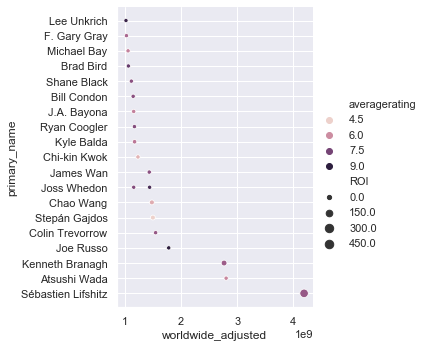

In [254]:
sns.set(style='darkgrid')
sns.relplot(x='worldwide_adjusted', y='primary_name', hue='averagerating',
           size='ROI', data=top_20_directors)

In [ ]:
lineplot